In [86]:
import numpy as np
import matplotlib.pyplot as plt
import math

# **Gradient descent algorithm**

<div align = "justify">

Cost function that indicates how well the model fits the set of points.
$$ J(w,b) = \frac{1}{n} \sum_{i = 1}^{n}({\hat{y_{i}}-y_{i}})^2 $$

\
**Step 1: Compute predictions**

For a given input $x_{i}$, we predict the output using the equation of the straight line:
$$ \widehat{y_{i}} = \omega x_{i} + b $$

\
**Step 2: Compute gradients**

To minimize $J(\omega, b)$, we compute its partial derivatives.

We calculate the gradients (partial derivatives) to determine how much to adjust $\omega$ and $\beta$.

The gradient respect to $\omega$ measures how much this variable change based on the difference between predicted and actual values.
$$\frac{\partial J}{\partial \omega}= \frac{1}{n}\sum x_{i}(\hat{y_{i}} - y_{i})$$

\
The gradient respect to $b$ measures how much this variable changes.
$$\frac{\partial J}{\partial b}=\frac{1}{n}\sum (\hat{y_{i}} - y_{i})$$

\
**Step 3: Update parameters**

Update the parameters $\omega$ and $b$ using the learning rate $\alpha$:

$$\omega:=\omega - \alpha \frac{\partial J}{\partial \omega}$$

\
$$b:=b - \alpha \frac{\partial J}{\partial b}$$

Recall...

Small $\alpha$: Slow convergence.

Large $\alpha$: Risk of overlooking the minimum.
</div>

In [87]:
def gradient_descent(x, y, w, b, learning_rate, iterations_num):

  points_num = len(x) # Obtain the number of points
  y_prediction = 0

  for i in range(iterations_num):
    # Restart the gradients in each iteration
    dw = 0
    db = 0
    # Restart cost in every iteration (MSE: It measures how well our model is fitting the data)
    cost = 0

    for j in range(points_num):
      y_prediction = (w * x[j]) + b  # Compute the predicted value
      # Compute gradients

      # Respect to w
      dw += x[j] * (y_prediction - y[j])
      # Respect to b
      db += y_prediction - y[j]
      # Cost
      cost += (y_prediction - y[j]) ** 2

    # Average gradients
    dw = (1/points_num) * dw
    db = (1/points_num) * db

    # MSE for the every iteration
    cost = cost / points_num

    # Update parameters
    w = w - (learning_rate * dw)
    b = b - (learning_rate * db)

    # Prints the updates every 100 iterations
    if i % 100 == 0:
      print(f"Iteration {i}: w = {w}, b = {b}, cost = {cost}")
  return w, b, cost

def plot_line(x, y, w, b):
  x_line = np.linspace(min(x) - 1, max(y) + 1, 100)
  y_line = [(w*i) + b for i in x_line]

  plt.scatter(x,y, color='green')
  plt.plot(x_line, y_line, color='red')
  plt.title("Scatterplot with line that best fits the points")
  plt.show()

In [88]:
# We want to find the straight line that best fits the data

# Input data (van en pares)
x = np.array([1, 4, 3.5, 6, 2, 8])
y = np.array([3, 5, 6, 7, 4, 8])
w = 0 # Slope
b = 0 # Intercept
learning_rate = 0.01 # Learning rate (size of step)
iterations_num = 1000

optimal_w, optimal_b, optimal_cost = gradient_descent(x, y, w, b, learning_rate, iterations_num)
print(f"\nOptimal w: {round(optimal_w, 8)}. Optimal b: {round(optimal_b, 8)}. Optimal cost: {round(optimal_cost, 8)}")

Iteration 0: w = 0.2633333333333333, b = 0.055, cost = 33.166666666666664
Iteration 100: w = 1.053717516428202, b = 0.7389141720736314, cost = 1.1101717707313339
Iteration 200: w = 0.9779169704808339, b = 1.1467028767983605, cost = 0.7631759365362449
Iteration 300: w = 0.9183660060255229, b = 1.4670727416253824, cost = 0.5490066486545863
Iteration 400: w = 0.8715811534490366, b = 1.7187639952091733, cost = 0.41681922923459225
Iteration 500: w = 0.8348257045554069, b = 1.91649946937677, cost = 0.3352318362626708
Iteration 600: w = 0.8059496271719503, b = 2.0718458200645893, cost = 0.2848752840191837
Iteration 700: w = 0.7832637977193305, b = 2.1938901258403374, cost = 0.2537947179968845
Iteration 800: w = 0.7654411949080425, b = 2.2897714420497977, cost = 0.23461148282233135
Iteration 900: w = 0.751439274826948, b = 2.365098404169199, cost = 0.2227713988451543

Optimal w: 0.74053637. Optimal b: 2.42375341. Optimal cost: 0.21552058


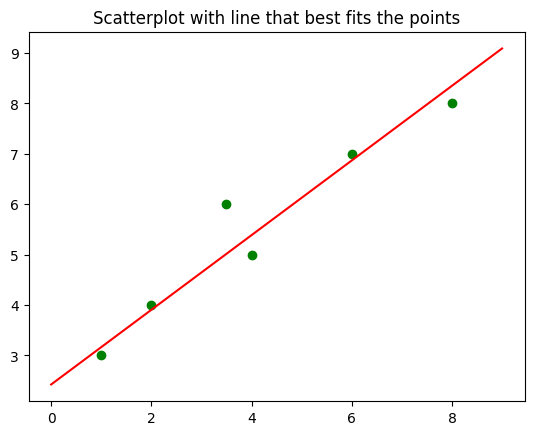

In [89]:
plot_line(x, y, optimal_w, optimal_b)

## **Newton's method in optimization**

<div align = "justify">

**Step 1: Initialize**

Chose an initial point $x_{0}$ ando tolerance.

\
**Step 2: Compute Gradient and Hessian**

Compute the first derivative (gradient) to determine the slope:
$$f'(x_{n})=\nabla f(x_{n})$$

Compute the second derivative (Hessian) to adjust the step size:
$$f''(x_{n})=Hf(x_{n})$$

\
**Step 3: Update using Newton's formula**

Use the formula
$$x_{n+1} = x_{n} - \frac{\nabla f(x_{n})}{H f(x_{n})}$$

Where:
$\nabla f(x_{n})$ tells us where to move

$Hf(x_{n})$ tells us how much to move

\
**Step 4: Repeat until convergence**

Repeat the previous computations until the gradient is less than the tolerance.

</div>

In [90]:
class Newtons_algorithm():

  def __init__(self, start, iter_num, tol):
      self._x = start  # Initialize the starting point
      self._iter_num = iter_num
      self._tol = tol

  def f(self, x):  # Define function with parameter
      return  x**4 + x**3

  def first_derivative(self, x, h=1e-6):  # Use central difference
      return (self.f(x + h) - self.f(x)) / h

  def second_derivative(self, x, h=1e-6):
      return (self.f(x + h) - 2 * self.f(x) + self.f(x - h)) / (h**2)

  def newtons_method(self):
      for _ in range(self._iter_num):
          gradient = self.first_derivative(self._x)  # Compute first derivative
          hessian = self.second_derivative(self._x)  # Compute second derivative

          if np.abs(gradient) <= self._tol:  # Check if gradient is close to zero
              break
          if hessian == 0:  # Prevent division by zero
              print("Hessian is zero, stopping to avoid division by zero.")
              break

          self._x = self._x - (gradient / hessian)  # Newton's update step
      return self._x

  def graph_minimum(self, x_min, y_min):  # Plot the function and the minimum value
    x = np.linspace(x_min - 4.9, x_min + 5.1, 100)  # Define the range around the minimum
    y = [self.f(num) for num in x]  # Calculate the function values for each x

    plt.plot(x, y, label="Function", color='blue')
    plt.scatter(x_min, y_min, color='red', label="Minimum")  # Plot the minimum point
    plt.title("Function with minimum point using Newton's algorithm")
    plt.xlim(x_min - 5, x_min + 5)  # Set limits in x-axis relative to the minimum
    plt.ylim(min(y) - 1, min(y) + 1)  # Set dynamic limits for the y-axis based on the function's values
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()  # Show the labels
    plt.grid()
    plt.show()

In [91]:
start = -10
iterations_num = 100
tol = 1e-6

# Running Newton's method
n_algorithm = Newtons_algorithm(start, iterations_num, tol)
x_min = n_algorithm.newtons_method()
y_min = n_algorithm.f(x_min)
print(f"Solution found (x axis):  {x_min}")
print(f"Minimum value (y axis): {y_min}")

Solution found (x axis):  -0.750000513852295
Minimum value (y axis): -0.10546874999970296


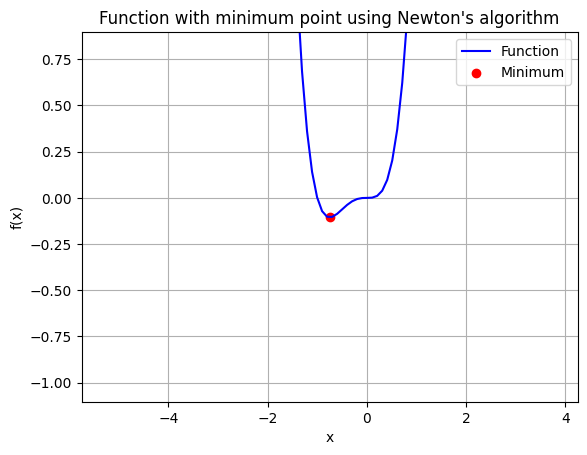

In [92]:
n_algorithm.graph_minimum(x_min, y_min)

# **Particle Swarm Optimization (PSO) Algorithms**

<cin align = "justify">

**Step 1: Initialize particles**

Define the positions of particles $(x_{i})$, and its velocities $(v_{i})$.

**Step 2: Compute fitness values**

Evaluate every $x_{i}$ into the function $f(x_{i})$.

**Step 3: Update velocities**

$v_{i}=\omega \cdot v_{i}+c1 \cdot r1 \cdot (p_{i} - x_{i})+c2 \cdot r2 \cdot (x_{g} - x_{i}) $

Where:
* $v_{i}$ is the velocity of the particle $i$.
* $x_{i}$ is the current position of the particle.
* $p_{i}$ is the personal best position; it is the best position (lowest function value) a specific particle has found so far
* $x_{g}$ is the global best position; this particle is the lowest function value found by any particle so far
* $\omega$ is the inertia factor, it controls how much momentum the particle
carries forward
* $c1$ is the cognitive coefficient; it controls how much a particle is influence by its own best position ($p_{i}$). A higher $c1$ means particles explore more based on their own experience
* $c2$ is the social component, this controls how much a particle is influenced by the global best position (x_{g}). A higher $c2$ means particles are more likely to follow the best solution found by the group
* $r1$ and $r2$ are the random numbers between 0 and 1 to add stochastic behavior

\
**Step 4: Comparte best positions**
At each iteration, we compare the fitness values of all personal bests:
$$x_{g}= p_{i}$$ if $$f(p_{i})<f(x_{g})$$

If any particle finds a better position, the global best is updated.

\
**Step 5: Update positions**

For each particle, update its position using:
$$x_{i} = x_{i} + v_{i}$$

**Step 6: Return the best solution**

Return the global best position $(x_{g})$

In [93]:
def pso(f, particles_num, iter_num, w, c1, c2):
  # Initialize particles and velocities
  particles = np.random.uniform(-10, 10, particles_num).tolist()  # Positions
  velocities = np.random.uniform(-1, 1, particles_num).tolist()  # Velocities
  best_positions = list(particles)  # Best positions
  best_fitness = [f(x) for x in particles]  # Compute initial fitness

  # Initialize global best
  global_best_function = min(best_fitness)
  global_best_position = best_positions[best_fitness.index(global_best_function)]

  # Graph the points
  # Initialise the subplot function using number of rows and columns
  fig, axis = plt.subplots(1, 2, figsize=(12, 5))

  # Initial positions
  axis[0].scatter(particles, [f(x) for x in particles], color="blue")
  axis[0].set_title("Initial particle positions")
  axis[0].set_xlabel("Particle position")
  axis[0].set_ylabel("Function value")

  for _ in range(iter_num):
    for i in range(particles_num):
      r1, r2 = np.random.random(), np.random.random() # Generate random numbers in (0,1)

      # Update velocity
      velocities[i] = (w * velocities[i] +
                        c1 * r1 * (best_positions[i] - particles[i]) +
                        c2 * r2 * (global_best_position - particles[i]))

      # Update position
      particles[i] += velocities[i]

      # Compute new fitness
      fitness = f(particles[i])

      # Update personal best
      if fitness < best_fitness[i]:
        best_fitness[i] = fitness
        best_positions[i] = particles[i]

        # Update global best
        if fitness < global_best_function:
          global_best_function = fitness
          global_best_position = best_positions[i]


  # After optimization: plot final particle positions
  axis[1].scatter(particles, [f(x) for x in particles], color="orange")
  axis[1].set_title("Final particle positions")
  axis[1].set_xlabel("Particle position")
  axis[1].set_ylabel("Function value")
  plt.show()

  return global_best_position, global_best_function

def f(x):
  return 3*(x**4) + x**3 + 2

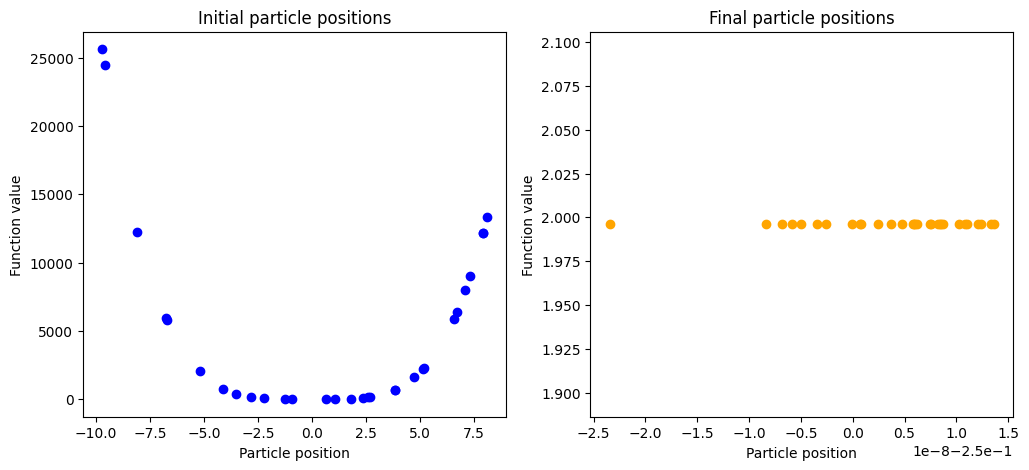

Best position: -0.2499999915347937. Best value: 1.99609375


In [94]:
# Generate the particles
particles_num = 30
iterations_num = 100
w = 0.5
c1 = 1.5
c2 = 1.5

best_position, best_value = pso(f, particles_num, iterations_num, w, c1, c2)
print(f"Best position: {best_position}. Best value: {best_value}")
#print(particles)

# **Simulated annealing algorithm**

<div align = "justify">
This algorithm is an optimization method that resembles the process of cooling metals.

**Step 1: Initialization**

Define a function $f(x)$, an initial state $(x_{0})$ and an initial temperature $(T_{0})$.

\
**Step 2: Neighbor generation**

A neighbor $s'$ of the current state $s$ is generated, i.e. a nerby solution.

\
**Step 3: Neighbor evaluation**

The energy difference (objective function difference) between the current state and the neighbor is calculated:
$$\Delta E = E(s') - E(s)$$

\
**Step 4: Evaluate acceptance**
* If $\Delta E < 0$, $s'$ is accepted as the new state since it is better than $s$.
* If $\Delta E \geq 0$, $s'$ is accepted as a probabilitiy:$$P_{acceptance} = e^{- \frac{\Delta E}{T}}$$

\
**Step 5: Cooling**

The temperature $T$ is reduced according to a cooling scheme, such as $T \leftarrow \alpha T$.

Where $\alpha$ is the cooling rate and $0 < \alpha < 1$.

\
**Step 6: Return values**
Return the best $T$ value and its image.
</div>

In [95]:
def simulated_annealing(f, iter_num, cur_solution, cur_temp, cooling_rate):
  best_solution = cur_solution
  y_best_value = f(cur_solution)

  for _ in range(iter_num):
      # Perturb the current solution slightly
      new_solution = cur_solution + np.random.uniform(-1, 1)  # Perturb within a range
      new_value = f(new_solution)

      # Calculate energy difference
      delta_temp = new_value - y_best_value

      # If the new solution is better or accepted with some probability
      if delta_temp < 0:  # If the new solution is better
          best_solution = new_solution
          y_best_value = new_value
      else:
          # Accept the new solution with probability e^(-delta_temp / cur_temp)
          proba_acceptance = math.exp(-delta_temp / cur_temp)
          if np.random.rand() < proba_acceptance:
              best_solution = new_solution
              y_best_value = new_value

      # Cool down temperature
      cur_temp *= cooling_rate

  return best_solution, y_best_value  # Return the best solution found and its value

def f(x):
  return (x**4 + np.cos(x))

def graph_minimum_sa(f, x_min, y_min):
  x = np.linspace(x_min - 4.9, x_min + 5.1, 100)
  y = f(x)

  plt.plot(x, y, color='orange', label="Function")
  plt.scatter(x_min, y_min, color='red', label="Minimum point")
  plt.xlim(x_min - 5, x_min + 5)
  plt.ylim(y_min - 1, y_min + 1)
  # Titles
  plt.title("Function with minimum point using simulated annealing (SA)")
  plt.xlabel("x")
  plt.ylabel("f(x)")
  plt.legend()
  plt.grid()
  plt.show()


In [96]:
iter_num = 1000
cur_solution = 1.0
cur_temp = 10.0
cooling_rate = 0.99

# Run the Simulated Annealing algorithm
x_best_solution, y_best_solution = simulated_annealing(f, iter_num, cur_solution, cur_temp, cooling_rate)

print(f"Best solution: {x_best_solution}. Function value: {y_best_solution}")

Best solution: 0.457425697909678. Function value: 0.9409730369800549


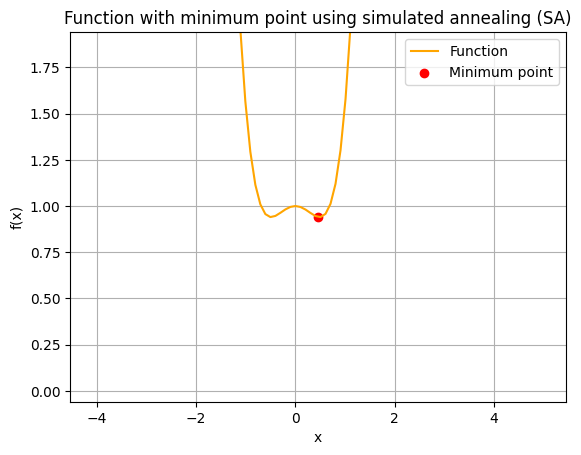

In [97]:
graph_minimum_sa(f, x_best_solution, y_best_solution)